In [ ]:
pip install pyspark

In [ ]:
#pip install opendatasets

In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
import pyspark.sql.functions as F
from pyspark.sql.functions import when
import numpy as np
from pyspark.sql.functions import col, count
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
#import opendatasets as od

In [ ]:
# Define la URL del clúster de Spark
spark_cluster_url = "spark://localhost:7077"

In [ ]:
mi_sesion = SparkSession \
            .builder \
            .appName("Count Lines in HDFS") \
            .master(spark_cluster_url) \
            .getOrCreate()

Py4JJavaError: An error occurred while calling o45.applyModifiableSettings.
: java.lang.IllegalStateException: LiveListenerBus is stopped.
	at org.apache.spark.scheduler.LiveListenerBus.addToQueue(LiveListenerBus.scala:92)
	at org.apache.spark.scheduler.LiveListenerBus.addToStatusQueue(LiveListenerBus.scala:75)
	at org.apache.spark.sql.internal.SharedState.<init>(SharedState.scala:115)
	at org.apache.spark.sql.SparkSession.$anonfun$sharedState$1(SparkSession.scala:143)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.SparkSession.sharedState$lzycompute(SparkSession.scala:143)
	at org.apache.spark.sql.SparkSession.sharedState(SparkSession.scala:142)
	at org.apache.spark.sql.SparkSession.$anonfun$sessionState$2(SparkSession.scala:162)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.SparkSession.sessionState$lzycompute(SparkSession.scala:160)
	at org.apache.spark.sql.SparkSession.sessionState(SparkSession.scala:157)
	at org.apache.spark.sql.SparkSession$.conf$lzycompute$1(SparkSession.scala:1213)
	at org.apache.spark.sql.SparkSession$.conf$1(SparkSession.scala:1213)
	at org.apache.spark.sql.SparkSession$.applyModifiableSettings(SparkSession.scala:1216)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)


In [ ]:
SpContext = mi_sesion.sparkContext

In [ ]:
#abrir csv
#datos = mi_sesion.read.csv('diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv', header = True)

In [ ]:
datos = mi_sesion.read.csv("diabetes.csv", header = True, sep = ";")

Py4JJavaError: An error occurred while calling o25.read.
: java.lang.IllegalStateException: LiveListenerBus is stopped.
	at org.apache.spark.scheduler.LiveListenerBus.addToQueue(LiveListenerBus.scala:92)
	at org.apache.spark.scheduler.LiveListenerBus.addToStatusQueue(LiveListenerBus.scala:75)
	at org.apache.spark.sql.internal.SharedState.<init>(SharedState.scala:115)
	at org.apache.spark.sql.SparkSession.$anonfun$sharedState$1(SparkSession.scala:143)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.SparkSession.sharedState$lzycompute(SparkSession.scala:143)
	at org.apache.spark.sql.SparkSession.sharedState(SparkSession.scala:142)
	at org.apache.spark.sql.SparkSession.$anonfun$sessionState$2(SparkSession.scala:162)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.SparkSession.sessionState$lzycompute(SparkSession.scala:160)
	at org.apache.spark.sql.SparkSession.sessionState(SparkSession.scala:157)
	at org.apache.spark.sql.DataFrameReader.<init>(DataFrameReader.scala:699)
	at org.apache.spark.sql.SparkSession.read(SparkSession.scala:783)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)


In [ ]:
datos.show(5)

+--------+--------------------+-------------------+---------+---+-------+---+---+---------+------+---------+------------------+------------+-----------+---------+-----------+-----------+-----------------+------+----+---------+--------+
|Diabetes|HipertensionArterial|HiperColesterolemia|CholCheck|IMC|Fumador|ACV|IAM|ActFisica|Frutas|Vegetales|AltoConsumoAlcohol|CoberturaMed|NoDocbcCost|SaludGral|SaludMental|SaludFisica|DificultadCaminar|Genero|Edad|Educacion|Ingresos|
+--------+--------------------+-------------------+---------+---+-------+---+---+---------+------+---------+------------------+------------+-----------+---------+-----------+-----------+-----------------+------+----+---------+--------+
|       0|                   1|                  1|        1| 40|      1|  0|  0|        0|     0|        1|                 0|           1|          0|        5|         18|         15|                1|     0|   9|        4|       3|
|       0|                   0|                  0|     

Objetivo: crear un sistema de puntajes, que determine que registro cumple con los criterios diagnosticos de Sme. Metabolico:

1. Diabetes: 0=nodbt; 1=predbt; 2=dbt
2. Hipertensión Arterial: 0=no; 1=si
3. Hipercolesterolemia: 0=no; 1=si
4. IMC: categorizar. <25 = 0; 25-30 = 1; 30-35 = 2; >35 = 3

Los registros que tengan puntaje >= 3 serán considerados con Sme. Metabólico.

In [ ]:
#categorizar la variable IMC
datos = datos.withColumn("imc_categoria",
                   F.when(F.col("imc") < 25, 0)           #lo cambio a 0 porque no debería sumar 1 punto
                   .when((F.col("imc") >= 25) & (F.col("imc") < 30), 1)
                   .when((F.col("imc") >= 30) & (F.col("imc") < 35), 2)
                   .otherwise(3)
                   )

In [ ]:
#castear el resto de las variables de string a int
datos = datos.withColumn("diabetes_int", F.col("Diabetes").cast("integer")) \
              .withColumn("hta_int", F.col("HipertensionArterial").cast("integer")) \
              .withColumn("hipercol_int", F.col("HiperColesterolemia").cast("integer"))

OBJETIVO 1: Identificar qué registros cumplen con los criterios diagnósticos de SM y etiquetarlos como tal.

In [ ]:
#PUNTAJE: => 3 = Tiene Sme Metabolico
datos = datos.withColumn("PUNTAJE", F.col("diabetes_int") + F.col("hta_int") + F.col("hipercol_int") +
                                           F.col("imc_categoria"))

In [ ]:
#Creo variable dicotómica Sme. Metab. 0 = no (puntaje < 3); 1 = si (puntaje >=3)
datos = datos.withColumn("SmeMetab", when(datos["PUNTAJE"] >= 3, 1).otherwise(0))

OBJETIVO 2: Determinar la prevalencia del SM en la población estudiada.

In [ ]:
#determinar la prevalencia de SM en la población:
SM = datos.groupBy("SmeMetab").count()
SM.show()

+--------+------+
|SmeMetab| count|
+--------+------+
|       1|105665|
|       0|148015|
+--------+------+



In [ ]:
#total de registros
total_registros = datos.count()

In [ ]:
# Obtener la cantidad de registros con SM=1
registros_SM1 = SM.filter(SM["SmeMetab"] == 1).select("count").collect()[0][0]

# Calcular la prevalencia
prevalencia_SM = registros_SM1 / total_registros

print("Prevalencia de SM:", prevalencia_SM)

Prevalencia de SM: 0.41652869757174393


OBJETIVO 3: Analizar los casos con SM según género y edad.

In [ ]:
# Agrupar por las columnas "SM" y "genero" y contar los registros
gen_datos = datos.groupBy("SmeMetab", "Genero").count()

#Obtener el número de pacientes con SM=1 y género=0
SM1_gen0 = gen_datos.filter((gen_datos["SmeMetab"] == 1) & (gen_datos["Genero"] == 0)).select("count").collect()[0][0]

# Obtener el número de pacientes con SM=1 y género=1
SM1_gen1 = gen_datos.filter((gen_datos["SmeMetab"] == 1) & (gen_datos["Genero"] == 1)).select("count").collect()[0][0]

print("Número de pacientes con SM=1 y género=0:", SM1_gen0)
print("Número de pacientes con SM=1 y género=1:", SM1_gen1)

Número de pacientes con SM=1 y género=0: 55688
Número de pacientes con SM=1 y género=1: 49977


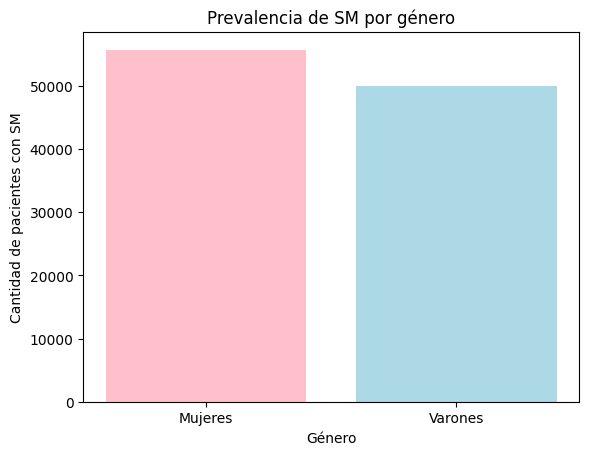

In [ ]:
#grafico SM/genero
# Crear un DataFrame con los resultados para la visualización
resultados = mi_sesion.createDataFrame([
    (0, SM1_gen0),
    (1, SM1_gen1)
], ["Género", "Cantidad"])

# Convertir el DataFrame a un Pandas DataFrame para facilitar la visualización
resultados_pd = resultados.toPandas()

# Crear un gráfico de barras
plt.bar(resultados_pd["Género"], resultados_pd["Cantidad"], color=['pink', 'lightblue'])
plt.xlabel("Género")
plt.ylabel("Cantidad de pacientes con SM")
plt.title("Prevalencia de SM por género")
plt.xticks([0, 1], ["Mujeres", "Varones"])
plt.show()

+--------+----+-----+
|SmeMetab|Edad|count|
+--------+----+-----+
|       1|  12| 8218|
|       1|   6| 7113|
|       1|  11|12538|
|       1|   9|15874|
|       1|   8|13421|
|       1|   7|10415|
|       1|  13| 7555|
|       1|   3| 2630|
|       1|  10|16727|
|       1|   1|  754|
|       1|   4| 3860|
|       1|   5| 5105|
|       1|   2| 1455|
+--------+----+-----+



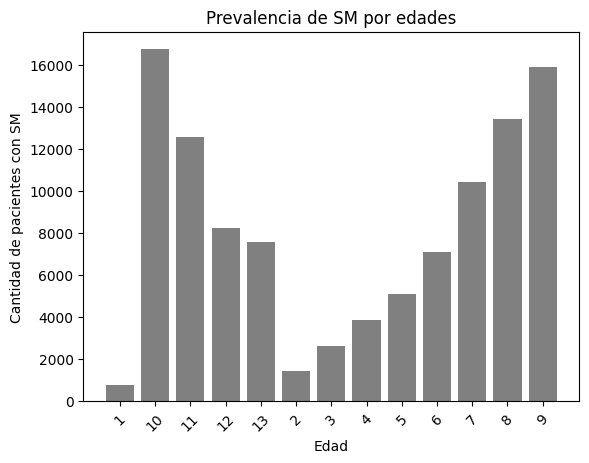

In [ ]:
#edades de pacientes con SM
edad_SM = datos.groupBy("SmeMetab", "Edad").count()

# Filtrar para obtener solo los pacientes con SM=1
edad_SM1 = edad_SM.filter(edad_SM["SmeMetab"] == 1)

# Mostrar los resultados para verificar
edad_SM1.show()

#orden
edad_SM1 = edad_SM1.orderBy("Edad")

# Convertir el DataFrame a un Pandas DataFrame para facilitar la visualización
pandas_edad = edad_SM1.toPandas()

# Crear un gráfico de barras
plt.bar(pandas_edad["Edad"], pandas_edad["count"], color='gray')
plt.xlabel("Edad")
plt.ylabel("Cantidad de pacientes con SM")
plt.title("Prevalencia de SM por edades")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.show()

OBJETIVO 4: Identificar posibles asociaciones entre SM como Factor de Riesgo y patologías cardiovasculares (ACV - IAM). Calculo de Odds Ratio

Filtrar los datos y contabilizarlos.

*   A = Expuesto + Enfermo
*   B = Expuesto + No enfermo
*   C = No expuesto + Enfermo
*   D = No expuesto + No enfermo

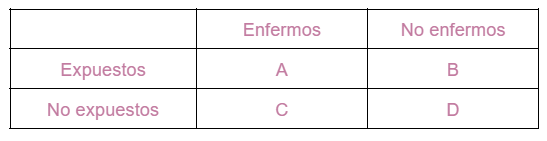


In [ ]:
datos = datos.withColumn("OR_IAM",
                        when((datos.SmeMetab == 1) & (datos.IAM == 1), "A")
                        .when((datos.SmeMetab == 0) & (datos.IAM == 1), "C")
                        .when((datos.SmeMetab == 1) & (datos.IAM == 0), "B")
                        .otherwise("D"))

In [ ]:
datos.show(10)

+--------+--------------------+-------------------+---------+---+-------+---+---+---------+------+---------+------------------+------------+-----------+---------+-----------+-----------+-----------------+------+----+---------+--------+-------------+------------+-------+------------+-------+--------+------+
|Diabetes|HipertensionArterial|HiperColesterolemia|CholCheck|IMC|Fumador|ACV|IAM|ActFisica|Frutas|Vegetales|AltoConsumoAlcohol|CoberturaMed|NoDocbcCost|SaludGral|SaludMental|SaludFisica|DificultadCaminar|Genero|Edad|Educacion|Ingresos|imc_categoria|diabetes_int|hta_int|hipercol_int|PUNTAJE|SmeMetab|OR_IAM|
+--------+--------------------+-------------------+---------+---+-------+---+---+---------+------+---------+------------------+------------+-----------+---------+-----------+-----------+-----------------+------+----+---------+--------+-------------+------------+-------+------------+-------+--------+------+
|       0|                   1|                  1|        1| 40|      1|  0

In [ ]:
A = datos.filter(datos.OR_IAM == "A")
B = datos.filter(datos.OR_IAM == "B")
C = datos.filter(datos.OR_IAM == "C")
D = datos.filter(datos.OR_IAM == "D")

In [ ]:
A_count = A.count()
B_count = B.count()
C_count = C.count()
D_count = D.count()

# Calcular OR
OR = (A_count * D_count)/(B_count * C_count)


In [ ]:
# Calcular el error estándar (aproximación de Wald)
SE_lnOR = np.sqrt(1/A_count + 1/B_count + 1/C_count + 1/D_count)

# Calcular el intervalo de confianza
z_alpha_2 = norm.ppf(0.975)  # Valor crítico para un intervalo de confianza del 95%
CI_lower = np.exp(np.log(OR) - z_alpha_2 * SE_lnOR)
CI_upper = np.exp(np.log(OR) + z_alpha_2 * SE_lnOR)

print("Odds ratio:", OR)
print("Intervalo de confianza (95%):", CI_lower, "-", CI_upper)

Odds ratio: 3.5025490604576763
Intervalo de confianza (95%): 3.4035828509122696 - 3.604392917194531


In [ ]:
datos = datos.withColumn("OR_ACV",
                        when((datos.SmeMetab == 1) & (datos.ACV == 1), "A")
                        .when((datos.SmeMetab == 0) & (datos.ACV == 1), "C")
                        .when((datos.SmeMetab == 1) & (datos.ACV == 0), "B")
                        .otherwise("D"))

In [ ]:
A = datos.filter(datos.OR_ACV == "A")
B = datos.filter(datos.OR_ACV == "B")
C = datos.filter(datos.OR_ACV == "C")
D = datos.filter(datos.OR_ACV == "D")

A_count1 = A.count()
B_count1 = B.count()
C_count1 = C.count()
D_count1 = D.count()

# Calculate the OR value
OR_ACV = (A_count1 * D_count1)/(B_count1 * C_count1)
print(OR_ACV)

2.6717942576499


In [ ]:
# Calcular el error estándar (aproximación de Wald)
SE_lnOR_ACV = np.sqrt(1/A_count1 + 1/B_count1 + 1/C_count1 + 1/D_count1)

# Calcular el intervalo de confianza
z_alpha_2 = norm.ppf(0.975)  # Valor crítico para un intervalo de confianza del 95%
CI_lower = np.exp(np.log(OR_ACV) - z_alpha_2 * SE_lnOR_ACV)
CI_upper = np.exp(np.log(OR_ACV) + z_alpha_2 * SE_lnOR_ACV)

print("Odds ratio:", OR_ACV)
print("Intervalo de confianza (95%):", CI_lower, "-", CI_upper)

Odds ratio: 2.6717942576499
Intervalo de confianza (95%): 2.563890174174265 - 2.784239600867468


In [ ]:
# Creando la nueva columna "sedentarismo"
datos = datos.withColumn("sedentarismo", F.when(F.col("ActFisica") == 1, 0).otherwise(1))


In [ ]:
datos = datos.withColumn("OR_AF",
                        when((datos.SmeMetab == 1) & (datos.sedentarismo == 1), "A")
                        .when((datos.SmeMetab == 0) & (datos.sedentarismo == 1), "B")
                        .when((datos.SmeMetab == 1) & (datos.sedentarismo == 0), "C")
                        .otherwise("D"))

In [ ]:
A = datos.filter(datos.OR_AF == "A")
B = datos.filter(datos.OR_AF == "B")
C = datos.filter(datos.OR_AF == "C")
D = datos.filter(datos.OR_AF == "D")

A_count2 = A.count()
B_count2 = B.count()
C_count2 = C.count()
D_count2 = D.count()

# Calculate the RR value
OR_AF = (A_count2 * D_count2)/(B_count2 * C_count2)
print(OR_AF)

2.0764125249131946


In [ ]:
# Calcular el error estándar (aproximación de Wald)
SE_lnOR_AF = np.sqrt(1/A_count2 + 1/B_count2 + 1/C_count2 + 1/D_count2)

# Calcular el intervalo de confianza
z_alpha_2 = norm.ppf(0.975)  # Valor crítico para un intervalo de confianza del 95%
CI_lower = np.exp(np.log(OR_AF) - z_alpha_2 * SE_lnOR_AF)
CI_upper = np.exp(np.log(OR_AF) + z_alpha_2 * SE_lnOR_AF)

print("Odds ratio:", OR_AF)
print("Intervalo de confianza (95%):", CI_lower, "-", CI_upper)

Odds ratio: 2.0764125249131946
Intervalo de confianza (95%): 2.0386331149975785 - 2.1148920528652893
